## Import code from lib.py

In [1]:
from lib import *
import numpy as np
import matplotlib.pyplot as plt
import qrcode
from PIL import Image
import hashlib
import random
import pathlib
from pathlib import Path
import cv2
import subprocess
import os

## Generate QR and watermark

In [4]:
img, wtm = make_secureQR('budi',qr_ver = 3, quant=16)

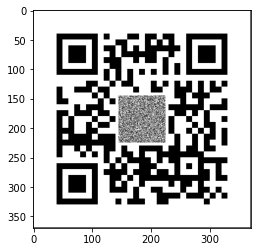

In [5]:
plt.imshow(img, cmap='gray')

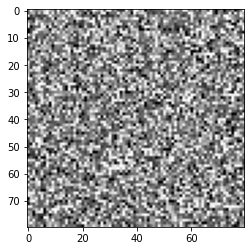

In [20]:
plt.imshow(wtm, cmap='gray')

## Generate A3 original batch

In [15]:
# Generate 8x5 QR in A3
def generate_batchA3(path,begin_num):
    path =Path(path)    
    count = begin_num
       
    rows = [] 
    col = []
    
    white_space = np.ones(shape=(74,2198),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    for j in range(4):
        col = []
        white_space = np.ones(shape=(370,174),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        for k in range(5):            
            print(f'data_{count} created')
            img,wtm = make_secureQR(f'data_{count:03}',qr_ver = 3, quant=8)             
            col.append(img)
            count += 1
        white_space = np.ones(shape=(370,174),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        rows.append(np.hstack(col))
        
    col = []
    white_space = np.ones(shape=(74,2198),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    grid = np.vstack(rows)
    try:
        os.mkdir(path)
    except:
        pass
    Image.fromarray(grid).save(path/f"data_{begin_num:03}_{count-1:03}_original.png")

In [18]:
# Generate 4x5 QR in A4
def generate_batchA4(path,begin_num):
    path =Path(path)    
    count = begin_num
       
    rows = [] 
    col = []
    
    white_space = np.ones(shape=(174,1554),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    for j in range(5):
        col = []
        white_space = np.ones(shape=(370,37),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        for k in range(4):            
            print(f'data_{count} created')
            img,wtm = make_secureQR(f'data_{count:03}_src2',qr_ver = 3, quant=8)             
            col.append(img)
            count += 1
        white_space = np.ones(shape=(370,37),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        rows.append(np.hstack(col))
        
    col = []
    white_space = np.ones(shape=(174,1554),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    grid = np.vstack(rows)
    try:
        os.mkdir(path)
    except:
        pass
    Image.fromarray(grid).save(path/f"data_{begin_num:03}_{count-1:03}_src2_original.png")

In [21]:
x = 1
while(x <= 1181):  
  generate_batchA4(path='batch_src2_original',begin_num=x)
  x += 20

data_1 created
data_2 created
data_3 created
data_4 created
data_5 created
data_6 created
data_7 created
data_8 created
data_9 created
data_10 created
data_11 created
data_12 created
data_13 created
data_14 created
data_15 created
data_16 created
data_17 created
data_18 created
data_19 created
data_20 created
data_21 created
data_22 created
data_23 created
data_24 created
data_25 created
data_26 created
data_27 created
data_28 created
data_29 created
data_30 created
data_31 created
data_32 created
data_33 created
data_34 created
data_35 created
data_36 created
data_37 created
data_38 created
data_39 created
data_40 created
data_41 created
data_42 created
data_43 created
data_44 created
data_45 created
data_46 created
data_47 created
data_48 created
data_49 created
data_50 created
data_51 created
data_52 created
data_53 created
data_54 created
data_55 created
data_56 created
data_57 created
data_58 created
data_59 created
data_60 created
data_61 created
data_62 created
data_63 created
d

## Autocrop from raw photos and generate datas from cropped datas

In [5]:
# List all filenames in folder
directory = 'RAW_ORI_041_080'
 
filename_list = os.listdir(directory)
filename_list = [f for f in filename_list if os.path.isfile(directory+'/'+f)] #Filtering only the files.
print(filename_list, len(filename_list))

['IMG20221130145515.jpg', 'IMG20221130145538.jpg', 'IMG20221130145602.jpg', 'IMG20221130145627.jpg', 'IMG20221130145650.jpg', 'IMG20221130145712.jpg', 'IMG20221130145735.jpg', 'IMG20221130145758.jpg', 'IMG20221130145818.jpg', 'IMG20221130145839.jpg', 'IMG20221130145859.jpg', 'IMG20221130145919.jpg', 'IMG20221130145941.jpg', 'IMG20221130150001.jpg', 'IMG20221130150025.jpg', 'IMG20221130150048.jpg', 'IMG20221130150106.jpg', 'IMG20221130150125.jpg', 'IMG20221130150146.jpg', 'IMG20221130150205.jpg', 'IMG20221130150234.jpg', 'IMG20221130150255.jpg', 'IMG20221130150314.jpg', 'IMG20221130150337.jpg', 'IMG20221130150355.jpg', 'IMG20221130150414.jpg', 'IMG20221130150432.jpg', 'IMG20221130150453.jpg', 'IMG20221130150511.jpg', 'IMG20221130150532.jpg', 'IMG20221130150552.jpg', 'IMG20221130150610.jpg', 'IMG20221130150627.jpg', 'IMG20221130150644.jpg', 'IMG20221130150703.jpg', 'IMG20221130150719.jpg', 'IMG20221130150738.jpg', 'IMG20221130150756.jpg', 'IMG20221130150814.jpg', 'IMG20221130150834.jpg']

In [15]:
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (0, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (0, 0, 0), 2)
        cv2.imshow('image', img)
 
# driver function
if __name__=="__main__":
 
    # reading the image
    img = cv2.imread('./raw_photo_datas_sample/IMG20221103153546.jpg',0)
    img = cv2.resize(img, (0, 0), fx=0.2, fy=0.2)
 
    # displaying the image
    cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
 
    # close the window
    cv2.destroyAllWindows()

59   262
469   259
471   671
65   663


### Crop with scaling

In [18]:
cropped_with_scaling = []
data_input_path = "RAW_ORI_081_120/"
output_path = "Temp/"
for i in range(len(filename_list)):
    img = cv2.imread(f'./{data_input_path}{filename_list[i]}',0)
    cropped_with_scaling.append(cv2.resize(img[260*5:665*5, 60*5:465*5], (370,370), interpolation=cv2.INTER_NEAREST))
    try:
        os.mkdir(output_path)
    except:
        pass
    Image.fromarray(cropped_with_scaling[i]).save(output_path+f"data_{filename_list[i]}_ORI.png")
    print(f"data_{filename_list[i]}_ORI.png created")

data_IMG20221109121614.jpg_ORI.png created
data_IMG20221109121712.jpg_ORI.png created
data_IMG20221109121752.jpg_ORI.png created
data_IMG20221109121856.jpg_ORI.png created
data_IMG20221109121942.jpg_ORI.png created
data_IMG20221109122018.jpg_ORI.png created
data_IMG20221109122102.jpg_ORI.png created
data_IMG20221109122139.jpg_ORI.png created
data_IMG20221109122207.jpg_ORI.png created
data_IMG20221109122304.jpg_ORI.png created
data_IMG20221109122338.jpg_ORI.png created
data_IMG20221109122432.jpg_ORI.png created
data_IMG20221109122505.jpg_ORI.png created
data_IMG20221109122541.jpg_ORI.png created
data_IMG20221109122616.jpg_ORI.png created
data_IMG20221109122653.jpg_ORI.png created
data_IMG20221109122739.jpg_ORI.png created
data_IMG20221109122819.jpg_ORI.png created
data_IMG20221109122852.jpg_ORI.png created
data_IMG20221109122927.jpg_ORI.png created
data_IMG20221109123000.jpg_ORI.png created
data_IMG20221109123042.jpg_ORI.png created
data_IMG20221109123117.jpg_ORI.png created
data_IMG202

In [19]:
bordered_cropped_with_scaling = []
for i in range(len(cropped_with_scaling)):
  for j in range(370):
    img = cropped_with_scaling[i]
    img[0] = 0
    img[369] = 0
    img[j][0] = 0
    img[j][369] = 0
  bordered_cropped_with_scaling.append(img)

In [15]:
# Generate 8x5 QR in A3 from cropped scaled photos
def generate_batchA3(path,begin_num):
    path =Path(path)    
    count = 0
       
    rows = [] 
    col = []
    
    white_space = np.ones(shape=(74,2198),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    for j in range(8):
        col = []
        white_space = np.ones(shape=(370,174),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        for k in range(5):    
            img = cropped_with_scaling[count]         
            col.append(img)
            print(f'data_{begin_num+count}')
            count += 1
        white_space = np.ones(shape=(370,174),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        rows.append(np.hstack(col))
        
    col = []
    white_space = np.ones(shape=(74,2198),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    grid = np.vstack(rows)
    Image.fromarray(grid).save(path/f"data_{begin_num:03}_{begin_num+count-1:03}_ORI.png")

In [20]:
generate_batchA3(path="",begin_num=81)

data_81
data_82
data_83
data_84
data_85
data_86
data_87
data_88
data_89
data_90
data_91
data_92
data_93
data_94
data_95
data_96
data_97
data_98
data_99
data_100
data_101
data_102
data_103
data_104
data_105
data_106
data_107
data_108
data_109
data_110
data_111
data_112
data_113
data_114
data_115
data_116
data_117
data_118
data_119
data_120


### Crop without scaling

In [13]:
# List all filenames in folder
directory = 'RAW_ORI_081_120'
 
filename_list = os.listdir(directory)
filename_list = [f for f in filename_list if os.path.isfile(directory+'/'+f)] #Filtering only the files.
print(filename_list, len(filename_list))

['IMG20221109121614.jpg', 'IMG20221109121712.jpg', 'IMG20221109121752.jpg', 'IMG20221109121856.jpg', 'IMG20221109121942.jpg', 'IMG20221109122018.jpg', 'IMG20221109122102.jpg', 'IMG20221109122139.jpg', 'IMG20221109122207.jpg', 'IMG20221109122304.jpg', 'IMG20221109122338.jpg', 'IMG20221109122432.jpg', 'IMG20221109122505.jpg', 'IMG20221109122541.jpg', 'IMG20221109122616.jpg', 'IMG20221109122653.jpg', 'IMG20221109122739.jpg', 'IMG20221109122819.jpg', 'IMG20221109122852.jpg', 'IMG20221109122927.jpg', 'IMG20221109123000.jpg', 'IMG20221109123042.jpg', 'IMG20221109123117.jpg', 'IMG20221109123157.jpg', 'IMG20221109124545.jpg', 'IMG20221109124624.jpg', 'IMG20221109124811.jpg', 'IMG20221109124915.jpg', 'IMG20221109124949.jpg', 'IMG20221109125037.jpg', 'IMG20221109125110.jpg', 'IMG20221109125146.jpg', 'IMG20221109125237.jpg', 'IMG20221109125311.jpg', 'IMG20221109125351.jpg', 'IMG20221109125424.jpg', 'IMG20221109125456.jpg', 'IMG20221109125529.jpg', 'IMG20221109125557.jpg', 'IMG20221109125628.jpg',

In [14]:

cropped_without_scaling = []
data_input_path = "RAW_ORI_081_120/"
output_path = "CROPPED_ORI_UNSCALED_081_120/"
for i in range(len(filename_list)):
    img = cv2.imread(f'./{data_input_path}{filename_list[i]}',0)
    cropped_without_scaling.append(img[260*5:665*5, 60*5:465*5])
    try:
        os.mkdir(output_path)
    except:
        pass
    Image.fromarray(cropped_without_scaling[i]).save(output_path+f"{i}_ORI.png")
    print(f"data_{i}_ORI.png created")

data_0_ORI.png created
data_1_ORI.png created
data_2_ORI.png created
data_3_ORI.png created
data_4_ORI.png created
data_5_ORI.png created
data_6_ORI.png created
data_7_ORI.png created
data_8_ORI.png created
data_9_ORI.png created
data_10_ORI.png created
data_11_ORI.png created
data_12_ORI.png created
data_13_ORI.png created
data_14_ORI.png created
data_15_ORI.png created
data_16_ORI.png created
data_17_ORI.png created
data_18_ORI.png created
data_19_ORI.png created
data_20_ORI.png created
data_21_ORI.png created
data_22_ORI.png created
data_23_ORI.png created
data_24_ORI.png created
data_25_ORI.png created
data_26_ORI.png created
data_27_ORI.png created
data_28_ORI.png created
data_29_ORI.png created
data_30_ORI.png created
data_31_ORI.png created
data_32_ORI.png created
data_33_ORI.png created
data_34_ORI.png created
data_35_ORI.png created
data_36_ORI.png created
data_37_ORI.png created
data_38_ORI.png created
data_39_ORI.png created
data_40_ORI.png created
data_41_ORI.png created
da

In [79]:
cropped_without_scaling

[array([[255, 255, 254, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 254, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[224, 223, 222, ..., 255, 255, 255],
        [246, 248, 249, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[163, 163, 167, ..., 255, 255, 255],
        [183, 186, 185, ..., 255, 255, 255],
        [196, 197, 194, ..., 255, 255, 255],
        ...,
        [184, 198, 209, ..., 255, 255, 255],
        [185, 198, 210, ..., 255, 255, 255],
        [185, 198, 209, ..., 255, 255, 255]], dtype=uint8),
 array([[175, 175, 180, ..., 255, 255, 255],
        [188, 185, 189, ..., 255, 255, 255],
        [196, 19

In [80]:
bordered_cropped_without_scaling = []
for i in range(len(cropped_without_scaling)):
  for j in range(2025):
    img = cropped_without_scaling[i]
    img[0] = 0
    img[2024] = 0
    img[j][0] = 0
    img[j][2024] = 0
  bordered_cropped_without_scaling.append(img)

In [85]:
# Generate 8x5 QR in A3 from cropped unscaled photos
def generate_batchA3(path,begin_num):
    path =Path(path)    
    count = 0
       
    rows = [] 
    col = []
    
    white_space = np.ones(shape=(406,12029),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    for j in range(8):
        col = []
        white_space = np.ones(shape=(2025,952),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        for k in range(5):    
            img = cropped_without_scaling[count]         
            col.append(img)
            print(f'data_{begin_num+count}')
            count += 1
        white_space = np.ones(shape=(2025,952),dtype='uint8')
        white_space.fill(255)
        col.append(white_space)
        rows.append(np.hstack(col))
        
    col = []
    white_space = np.ones(shape=(406,12029),dtype='uint8')
    white_space.fill(255)
    col.append(white_space)
    rows.append(np.hstack(col))
    
    grid = np.vstack(rows)
    Image.fromarray(grid).save(path/f"data_{begin_num:03}_{begin_num+count-1:03}_photo1.png")

In [86]:
generate_batchA3(path="",begin_num=1)

data_1
data_2
data_3
data_4
data_5
data_6
data_7
data_8
data_9
data_10
data_11
data_12
data_13
data_14
data_15
data_16
data_17
data_18
data_19
data_20
data_21
data_22
data_23
data_24
data_25
data_26
data_27
data_28
data_29
data_30
data_31
data_32
data_33
data_34
data_35
data_36
data_37
data_38
data_39
data_40
